In [1]:
import sys
sys.path.append('/Users/yumiao/Documents/Works/0nbb/nEXO/ASIC_SLAC/nEXO_CRYO_ASIC/')

import numpy as np  
import matplotlib.pyplot as plt

In [2]:
from scripts.CryoAsicAnalysis import CryoAsicAnalysis
from scripts.CryoAsicEventViewer import CryoAsicEventViewer

from scripts.comparison import comparison
cmp = comparison()


shapes = [ 'squarewave', ] # 'square' OR 'sine'
freqs = [50, 100, 150]
amps = [20,]

for freq in freqs:
    print(f"Frequency = {freq} kHz with period {1/freq*1e3:.3f} us.")
    for shape in shapes:
        for amp in amps:
            #infile = f'/Users/yumiao/Documents/Works/0nbb/nEXO/ASIC_SLAC/Data/CRB_glenn_2024Feb/halfspeed-20240229/halfspeed-932-12pt-3g-{shape}-pulse-{freq}kHz-{amp}mV.h5'
            infile = f'/Users/yumiao/Documents/Works/0nbb/nEXO/ASIC_SLAC/Data/CRB_glenn_2024Feb/asicboard2-tile-2024-3-4/fullspeed-932-12pt-3g-{shape}-{freq}kHz-{amp}mV.h5'
            label = f'FE932-{shape}-{freq}kHz-{amp}mV'
            
            configs = {'sampling_rate' : 1, 'dead_channels' : [], 'mv_per_adc':0.39, 'key_channel': -1, "basline": [0, 10], }
            tmp_ana = CryoAsicAnalysis(infile, config=configs)
            tmp_view = CryoAsicEventViewer(infile, config=configs)
            
            cmp._add_analyser(label, tmp_ana)
            cmp._add_viewer(label,   tmp_view)

            
#infile = f'/Users/yumiao/Documents/Works/0nbb/nEXO/ASIC_SLAC/Data/CRB_glenn_2024Feb/halfspeed-20240229/halfspeed-932-12pt-3g-decoupled.h5'
infile = f'/Users/yumiao/Documents/Works/0nbb/nEXO/ASIC_SLAC/Data/CRB_glenn_2024Feb/asicboard2-tile-2024-3-4/fullspeed-932-12pt-3g-noise.h5'
#label = f'FE932-decoupled'
label = f'FE932-noise'
configs = {'sampling_rate' : 1, 'dead_channels' : [], 'mv_per_adc':0.39, 'key_channel': -1, "basline": [0, 10], }
tmp_ana = CryoAsicAnalysis(infile, config=configs)
tmp_view = CryoAsicEventViewer(infile, config=configs)
            
cmp._add_analyser(label, tmp_ana)
cmp._add_viewer(label,   tmp_view)
            

cmp.calculate_noise();

Frequency = 50 kHz with period 20.000 us.
loading hdf5 file /Users/yumiao/Documents/Works/0nbb/nEXO/ASIC_SLAC/Data/CRB_glenn_2024Feb/asicboard2-tile-2024-3-4/fullspeed-932-12pt-3g-squarewave-50kHz-20mV.h5
Done loading
Frequency = 100 kHz with period 10.000 us.
loading hdf5 file /Users/yumiao/Documents/Works/0nbb/nEXO/ASIC_SLAC/Data/CRB_glenn_2024Feb/asicboard2-tile-2024-3-4/fullspeed-932-12pt-3g-squarewave-100kHz-20mV.h5
Done loading
Frequency = 150 kHz with period 6.667 us.
loading hdf5 file /Users/yumiao/Documents/Works/0nbb/nEXO/ASIC_SLAC/Data/CRB_glenn_2024Feb/asicboard2-tile-2024-3-4/fullspeed-932-12pt-3g-squarewave-150kHz-20mV.h5
Done loading
loading hdf5 file /Users/yumiao/Documents/Works/0nbb/nEXO/ASIC_SLAC/Data/CRB_glenn_2024Feb/asicboard2-tile-2024-3-4/fullspeed-932-12pt-3g-noise.h5
Done loading


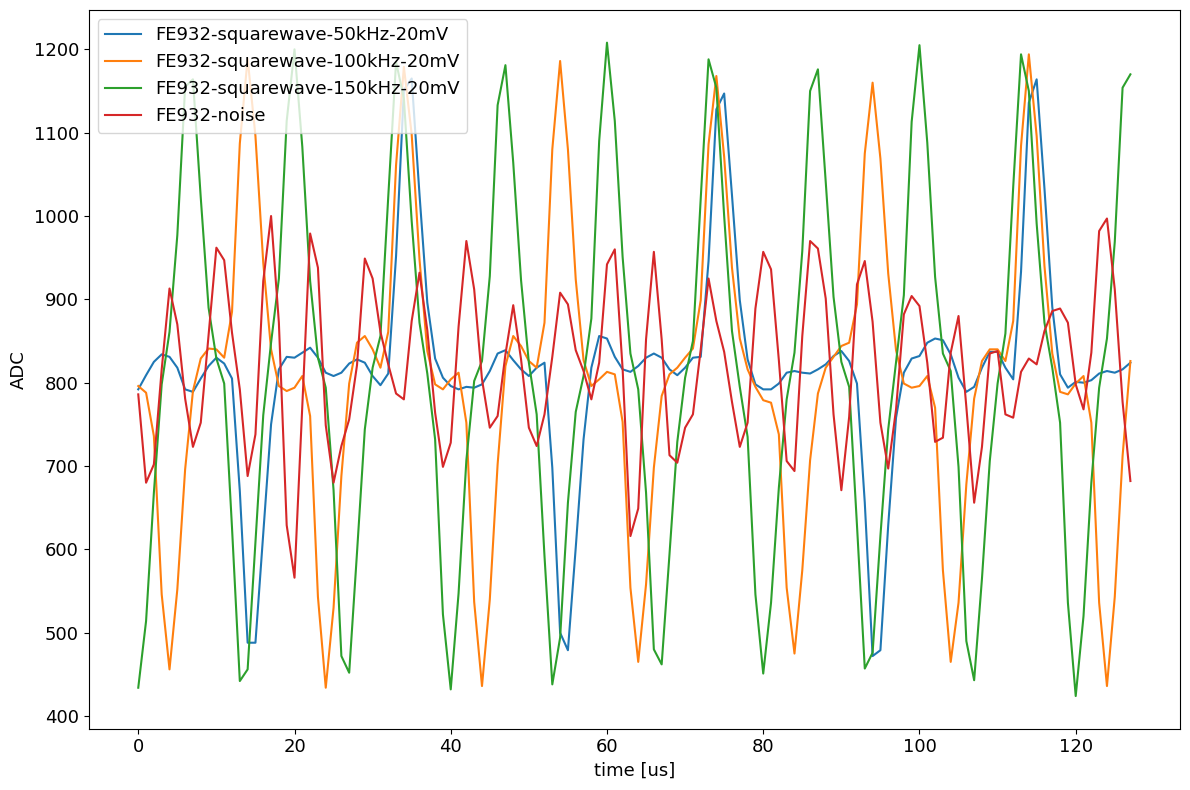

In [7]:
evtid, chid = 23, 10
fig = cmp._plot_oneChannel_oneEvent(evtid, chid)

Calculating stds on each channel...:   0%|          | 0/64 [00:00<?, ?it/s]

Calculating stds on each channel...:   0%|          | 0/64 [00:00<?, ?it/s]

Calculating stds on each channel...:   0%|          | 0/64 [00:00<?, ?it/s]

Calculating stds on each channel...:   0%|          | 0/64 [00:00<?, ?it/s]

[ 4  5  6  7 12 13 14 15 20 21 22 23 28 29 30 31 32 33 34 35 40 41 42 43
 48 49 50 51 56 57 58 59]


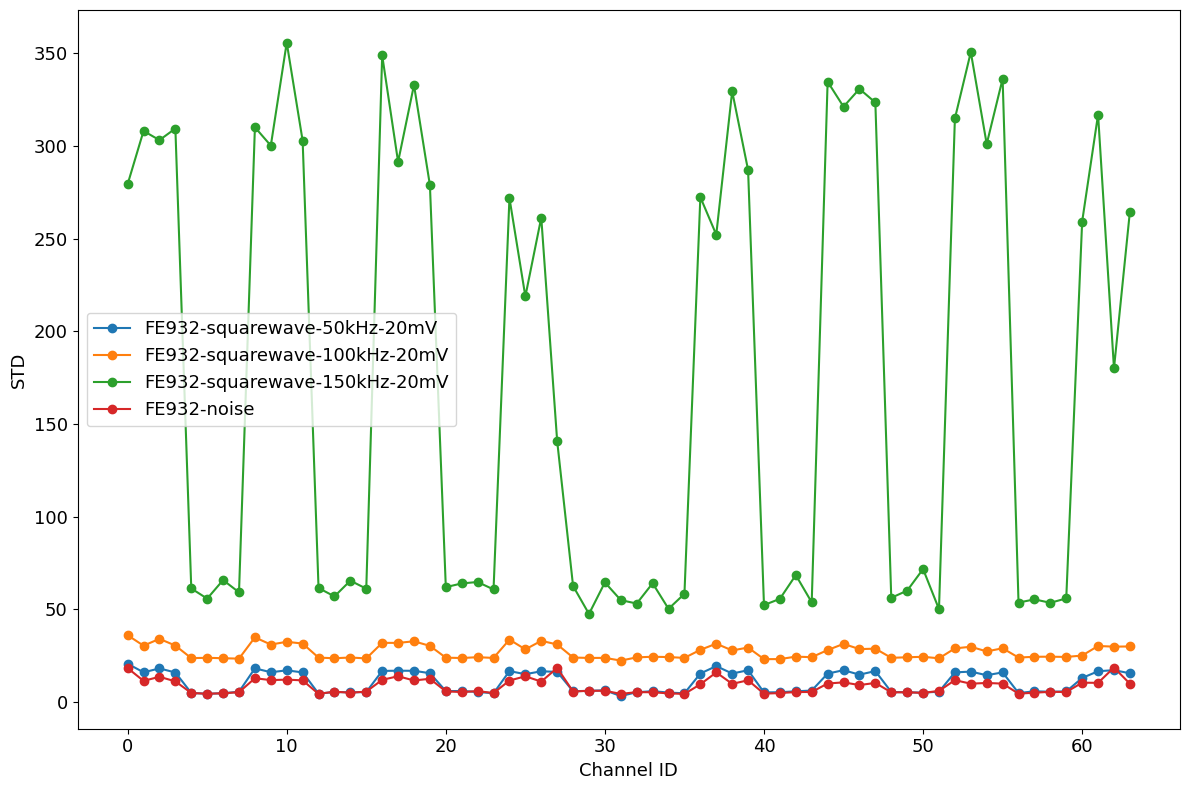

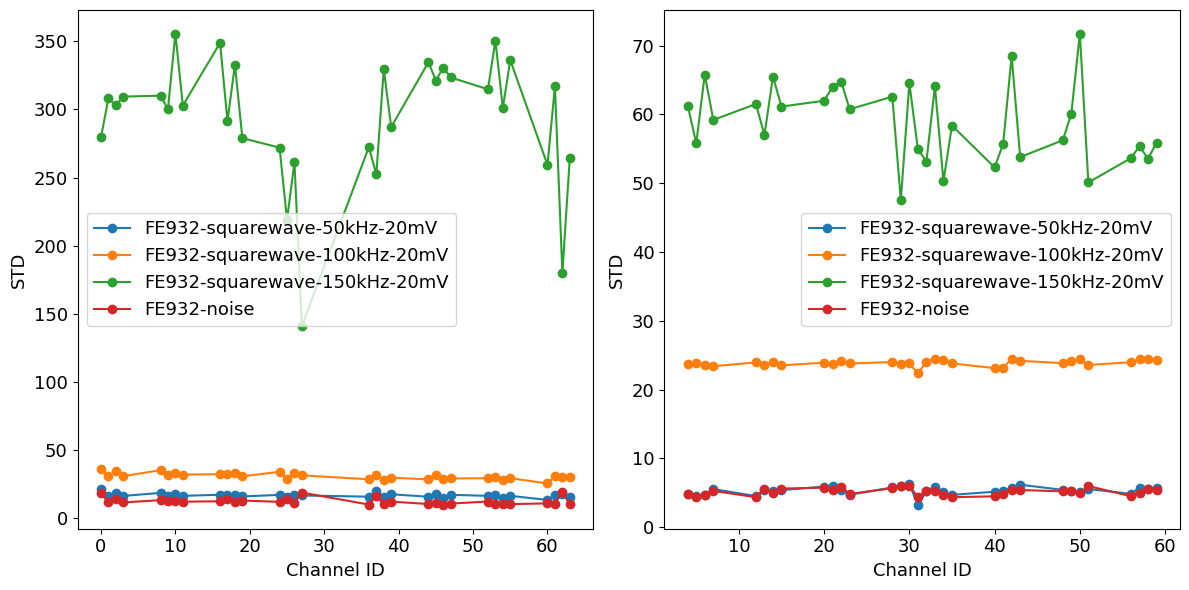

In [4]:



channels = []
for i in range(4):
    channels.append(i*8)
    channels.append(i*8+1)
    channels.append(i*8+2)
    channels.append(i*8+3)
for i in range(4):
    channels.append(32+i*8+4)
    channels.append(32+i*8+5)
    channels.append(32+i*8+6)
    channels.append(32+i*8+7)
cmp._set_coupled_channel(channels)
cmp._plot_std();
cmp._plot_std_separately();